In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("sales_data_sample.csv",encoding='unicode_escape')

In [54]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [55]:
features = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'YEAR_ID',
'QTR_ID', 'MONTH_ID']]

In [56]:

features = features.fillna(0)

In [63]:
features.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
MSRP                 int64
YEAR_ID              int64
QTR_ID               int64
MONTH_ID             int64
dtype: object

In [57]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [58]:
features.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
SALES              0
MSRP               0
YEAR_ID            0
QTR_ID             0
MONTH_ID           0
dtype: int64

In [59]:
sc=StandardScaler()
scaled_features=sc.fit_transform(features)

In [62]:
# Implementing K-Means with the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [ ]:
optimal_k = 3 # replace with your chosen k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(scaled_features)

In [ ]:
plt.scatter(features['QUANTITYORDERED'], features['SALES'], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

# GRADIENT DESCENT

In [71]:

import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [72]:
def objective(x):
    return (x+3)**2

In [73]:
def derivative(x):
    return 2*(x+3)

In [91]:
def gradient(alpha,start,max_itr):
    x_list=list()
    x=start
    x_list.append(x)
    for i in range(max_itr):
        gradi=derivative(x)
        x=x-(alpha*gradi)
        x_list.append(x)
    return x_list

    

In [90]:
alpha=0.1
start=2
max_itr=30
x=sym.symbols('x')
expr=(x+3)**2

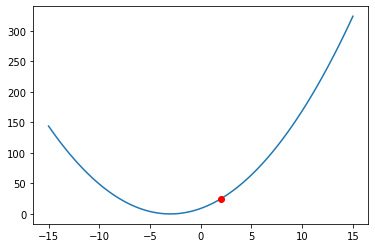

In [94]:
x_cor=np.linspace(-15,15,100)
plt.plot(x_cor,objective(x_cor))
plt.plot(2,objective(2),'ro')

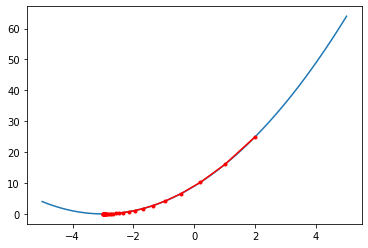

In [98]:
x=gradient(alpha,start,max_itr)
x_cor=np.linspace(-5,5,100)
plt.plot(x_cor,objective(x_cor))

x_arr=np.array(x)
plt.plot(x_arr,objective(x_arr),'.-',color='red')
plt.show()